# 케라스 Fashion MNIST 모델

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

<sub>출처: https://www.tensorflow.org/tutorials/keras/classification?hl=ko</sub>

### modules import


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### 데이터셋 로드

In [ ]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

4423680/4422102 [==============================] - 0s 0us/step


### 데이터 확인

In [ ]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (60000, 28, 28)	레이블: (60000,)
학습 데이터: (42000, 28, 28)	레이블: (42000,)
검증 데이터: (18000, 28, 28)	레이블: (18000,)
테스트 데이터: (10000, 28, 28)	레이블: (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names[y_train[0]]

'Pullover'

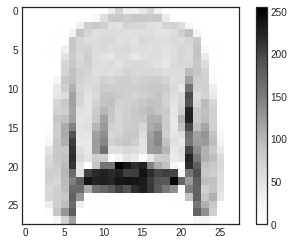

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

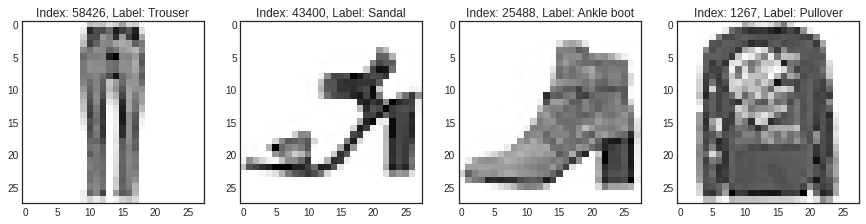

In [ ]:
num_sample = 4

random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
  image = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.imshow(image)
  plt.title("Index: {}, Label: {}".format(idx, class_names[label]))

### 데이터 전처리
- Normalization

- flatten

- loss = 'sparse_categorical_crossentropy'

In [ ]:
# flatten 후 normalization
x_train = (x_train.reshape(-1, 28*28)) / 255.
x_val = (x_val.reshape(-1, 28*28)) / 255.
x_test = (x_test.reshape(-1, 28*28)) / 255.

### 모델 구성 (함수형 API)

In [ ]:
input = Input(shape=(784, ), name='input')
hidden1 = Dense(256, activation='relu', name='hidden1')(input)
hidden2 = Dense(128, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(64, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(32, activation='relu', name='hidden4')(hidden3)
output = Dense(10, activation='softmax', name='output')(hidden4) # 클래스 10개니까 최종 레이어 노드 수 10
model = Model(inputs=[input], outputs=output)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
________________________________________________

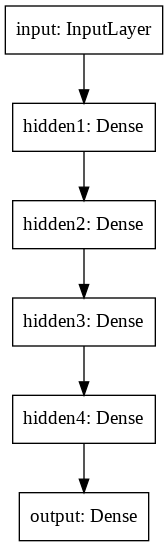

In [ ]:
plot_model(model)

### 모델 컴파일

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['acc'])

### 모델 학습
- 모델 시각화를 위해 history라는 변수에 학습 과정을 담음

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 3s 8ms/step - loss: 0.9770 - acc: 0.6995 - val_loss: 0.8460 - val_acc: 0.7247
Epoch 2/10
329/329 [==============================] - 3s 8ms/step - loss: 0.5322 - acc: 0.8115 - val_loss: 0.4819 - val_acc: 0.8204
Epoch 3/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4844 - acc: 0.8299 - val_loss: 0.6603 - val_acc: 0.8136
Epoch 4/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4641 - acc: 0.8387 - val_loss: 0.7061 - val_acc: 0.7447
Epoch 5/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4459 - acc: 0.8463 - val_loss: 0.6576 - val_acc: 0.8258
Epoch 6/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4485 - acc: 0.8479 - val_loss: 0.6353 - val_acc: 0.7663
Epoch 7/10
329/329 [==============================] - 3s 8ms/step - loss: 0.4584 - acc: 0.8488 - val_loss: 0.8711 - val_acc: 0.7180
Epoch 8/10
329/329 [==============================] - 3s 8ms/step - loss: 0.

### 학습 결과 시각화

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

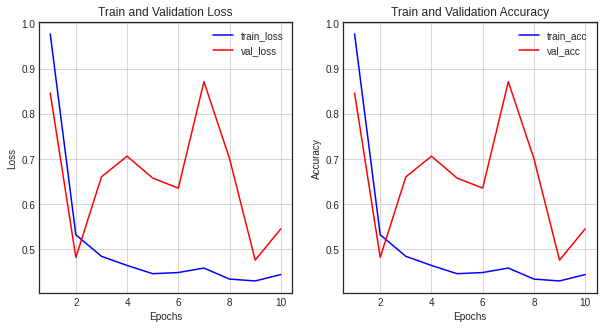

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, loss, color='blue', label='train_acc')
ax2.plot(epochs, val_loss, color='red', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 다른 옵티마이저로 실행
- 아래의 과정 다시 실행
  - 데이터셋 로드
  - 데이터 전처리
  - 모델 구성


In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),
              metrics=['acc'])

In [ ]:
history2 = model.fit(x_train, y_train,
                     epochs=10,
                     batch_size=128,
                     validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3576 - acc: 0.8783 - val_loss: 0.4751 - val_acc: 0.8421
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3296 - acc: 0.8812 - val_loss: 0.4180 - val_acc: 0.8648
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3211 - acc: 0.8842 - val_loss: 0.4052 - val_acc: 0.8680
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3141 - acc: 0.8849 - val_loss: 0.4114 - val_acc: 0.8672
Epoch 5/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3110 - acc: 0.8852 - val_loss: 0.4023 - val_acc: 0.8678
Epoch 6/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3099 - acc: 0.8861 - val_loss: 0.3971 - val_acc: 0.8689
Epoch 7/10
329/329 [==============================] - 2s 7ms/step - loss: 0.3068 - acc: 0.8865 - val_loss: 0.3934 - val_acc: 0.8688
Epoch 8/10
329/329 [==============================] - 2s 6ms/step - loss: 0.

In [ ]:
history2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

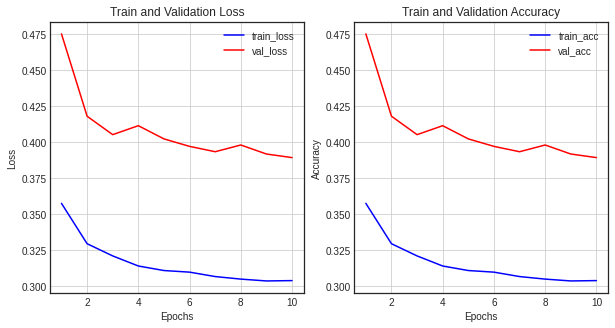

In [ ]:
history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, loss, color='blue', label='train_acc')
ax2.plot(epochs, val_loss, color='red', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 (1)
- optimizer: SGD()로 학습한 모델

- evaluate

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4477 - acc: 0.8655


[0.44773975014686584, 0.8654999732971191]

### 학습된 모델을 통해 값 예측

In [ ]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[0])

(10000, 10)
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.8954797e-02 0.0000000e+00 1.1958444e-02 1.1240364e-22 9.6908677e-01]


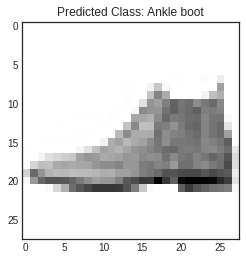

In [ ]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0].reshape(-1, 28))
plt.title("Predicted Class: {}".format(class_names[arg_pred_y[0]]))
plt.show()

In [ ]:
def plot_image(i, pred_ys, y_test, img):
  pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_ys)
  if predicted_label == y_test:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]),
             color=color)
  
def plot_value_array(i, pred_ys, true_label):
  pred_ys, true_label = pred_ys[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), pred_ys, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(pred_ys)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

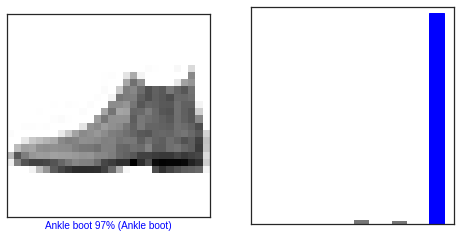

In [ ]:
i = 0
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

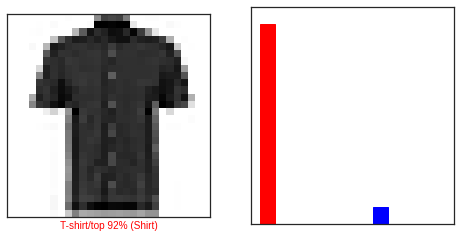

In [ ]:
i = 40
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

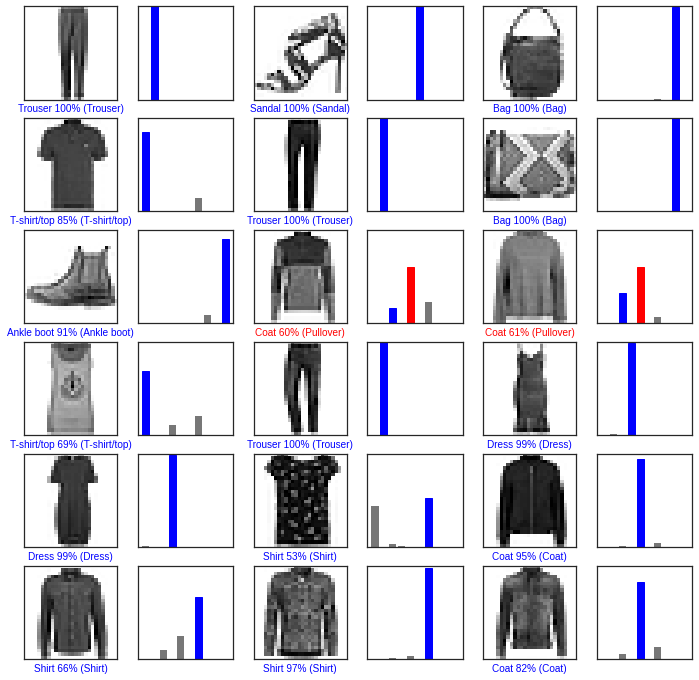

In [ ]:
num_rows = 6
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx, num in enumerate(random_num):
  plt.subplot(num_rows, 2*num_cols, 2*idx+1)
  plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
  plt.subplot(num_rows, 2*num_cols, 2*idx+2)
  plot_value_array(num, pred_ys, y_test)

plt.show()

### 모델 평가(2)
- optimizer: SGD()로 설정한 모델

- 혼동 행렬 (Confusion Matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white')

from tensorflow.keras.utils import to_categorical

In [ ]:
y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

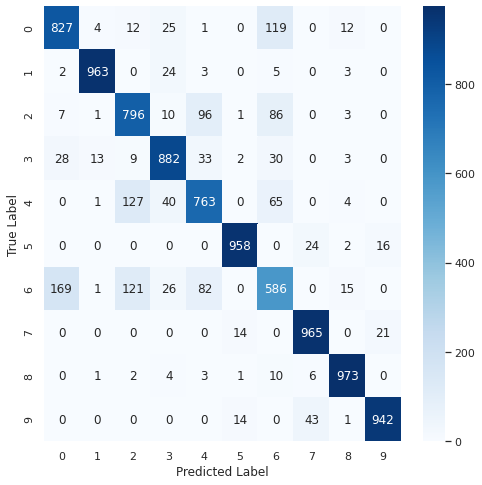

In [ ]:
plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 모델 평가 (3)
- optimizer: SGD()로 설정한 모델

- 분류 보고서

In [ ]:
print(classification_report(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.80      0.77      1000
           3       0.87      0.88      0.88      1000
           4       0.78      0.76      0.77      1000
           5       0.97      0.96      0.96      1000
           6       0.65      0.59      0.62      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.86      0.87      0.86     10000
weighted avg       0.86      0.87      0.86     10000

